# Notes for 7 September - More Operations on Arrays

Today we'll go all aggie with data on milk production per cow for each month from January 1962 through December 1974.

First our usual boilerplate.

In [1]:
%matplotlib inline
import numpy as np
import pylab

Now let's grab the data from the class web page. I used the Google link shortener to make it more reasonable to type. The full URL is https://wwwx.cs.unc.edu/Courses/comp116-001-f16/media/monthly-milk-62-75.txt. Of course, you should copy and paste from the today.html page linked from the class homepage.

In [2]:
milk = np.genfromtxt('http://goo.gl/0LcCWj')

We can look to see how many we have with the **shape** property of the array object. The object returned by **shape** is a **tuple**. Think of it as just like a **list** except it is **immutable**.

In [3]:
milk.shape

(156,)

I can find the dimensionality of the array by applying the **len** function to the shape. Below we can see that milk is a 1-D array because the length of its shape is 1.

In [4]:
len(milk.shape)

1

Or we can get the number of elements with the **len** function. Len applied to an array gives the length of the first dimension. 

In [5]:
len(milk)

156

Since the number isn't too large, let's look at them.

In [6]:
print(milk)

[ 578.  609.  628.  665.  713.  707.  628.  588.  576.  566.  561.  571.
  589.  615.  641.  682.  728.  726.  648.  605.  591.  576.  573.  587.
  616.  648.  675.  715.  756.  746.  665.  627.  612.  599.  602.  622.
  646.  676.  696.  732.  767.  767.  689.  641.  624.  609.  610.  623.
  664.  690.  722.  766.  796.  809.  721.  684.  670.  654.  654.  675.
  700.  725.  748.  795.  821.  828.  753.  708.  690.  674.  669.  685.
  704.  730.  760.  807.  842.  838.  768.  726.  711.  693.  686.  698.
  720.  750.  770.  816.  855.  857.  786.  750.  735.  709.  700.  720.
  736.  768.  792.  836.  869.  871.  804.  768.  750.  733.  721.  737.
  789.  821.  844.  890.  924.  926.  853.  818.  801.  785.  774.  785.
  811.  838.  873.  913.  943.  948.  877.  839.  820.  795.  777.  790.
  806.  840.  867.  911.  939.  937.  865.  821.  795.  776.  771.  787.
  813.  845.  872.  915.  951.  960.  891.  851.  826.  797.  784.  798.]


A graph might be more informative.

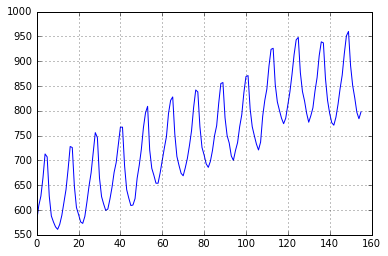

In [6]:
pylab.plot(milk)
pylab.grid(True)

Looking at the graph we learned that milk production is apparently seasonal and increased from year to year over the period.

We can get the average milk production over all the data.

In [8]:
np.mean(milk)

746.04487179487182

And any other function such as the standard deviation.

In [8]:
np.std(milk)

98.260077642534441

We can do all the comparison things we did last time. Here I see which months had greater than average milk production.

In [5]:
biggerThanAverage = milk > np.mean(milk)
print(biggerThanAverage)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False False False False False
 False False False False  True  True False False False False False False
 False False False  True  True  True False False False False False False
 False False  True  True  True  True  True False False False False False
 False False  True  True  True  True  True False False False False False
 False  True  True  True  True  True  True  True False False False False
 False  True  True  True  True  True  True  True  True False False False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]


If I wanted to know how many months had greater than average production I could use **selection** to create a new array with only the elements corresponding to True in the biggerThanAverage array and then get its length.

In [10]:
len(milk[biggerThanAverage])

79

This is common enough that numpy provides a function to count values that are not zero. A computer science secret is True is typically 1 and False is 0.

In [8]:
np.count_nonzero(biggerThanAverage)

79

Give the knowledge that True is 1 and False is 0 we can use a hack to get the number of True values by adding them up. This is a terrible hack but it works and we'll need it later because of a bug in count_nonzero.

In [12]:
np.sum(biggerThanAverage)

79

Now, I'd like to think about milk production in terms of years and months instead of just months. The cyclic nature of the data is just begging for analysis by months and years. I can **reshape** the data into a 2-D array with 13 rows and 12 columns.

Note the result will look very similar to what we printed above but this is a 2-D array. Notice all those extra square brackets. They are setting off the individual rows.

In [13]:
yearly = np.reshape(milk, (13, 12))
print(yearly)

[[ 578.  609.  628.  665.  713.  707.  628.  588.  576.  566.  561.  571.]
 [ 589.  615.  641.  682.  728.  726.  648.  605.  591.  576.  573.  587.]
 [ 616.  648.  675.  715.  756.  746.  665.  627.  612.  599.  602.  622.]
 [ 646.  676.  696.  732.  767.  767.  689.  641.  624.  609.  610.  623.]
 [ 664.  690.  722.  766.  796.  809.  721.  684.  670.  654.  654.  675.]
 [ 700.  725.  748.  795.  821.  828.  753.  708.  690.  674.  669.  685.]
 [ 704.  730.  760.  807.  842.  838.  768.  726.  711.  693.  686.  698.]
 [ 720.  750.  770.  816.  855.  857.  786.  750.  735.  709.  700.  720.]
 [ 736.  768.  792.  836.  869.  871.  804.  768.  750.  733.  721.  737.]
 [ 789.  821.  844.  890.  924.  926.  853.  818.  801.  785.  774.  785.]
 [ 811.  838.  873.  913.  943.  948.  877.  839.  820.  795.  777.  790.]
 [ 806.  840.  867.  911.  939.  937.  865.  821.  795.  776.  771.  787.]
 [ 813.  845.  872.  915.  951.  960.  891.  851.  826.  797.  784.  798.]]


I can get the shape of this new array and see that it is 2-D because the shape has 2 elements.

In [14]:
yearly.shape

(13, 12)

If I wanted the values for February in the first year I could use a subscript to get it. The first number is the year index and the second is the month index.

In [14]:
yearly[0, 1]

609.0

If I take the mean of a 2-D array I get a scalar (single number) just like I did for the 1-D array. Functions like mean apply to all the numbers in the array taken together.

In [15]:
np.mean(yearly)

746.04487179487182

To get the mean per month, I use the **axis** argument to specify the dimension I want to work along. By specifying **axis=0** below I'm telling it to work along the first dimension which in this case is the column dimension. The result is 12 means, one for each month.

In [16]:
np.mean(yearly, axis=0)

array([ 705.53846154,  735.        ,  760.61538462,  803.30769231,
        838.76923077,  840.        ,  765.23076923,  725.07692308,
        707.76923077,  689.69230769,  683.23076923,  698.30769231])

To get the yearly averages I use **axis=1**. This produces 13 means, one for each year.

In [17]:
np.mean(yearly, axis=1)

array([ 615.83333333,  630.08333333,  656.91666667,  673.33333333,
        708.75      ,  733.        ,  746.91666667,  764.        ,
        782.08333333,  834.16666667,  852.        ,  842.91666667,
        858.58333333])

Of course, I can use the values just like any other. For example, I can plot the monthly milk production. 

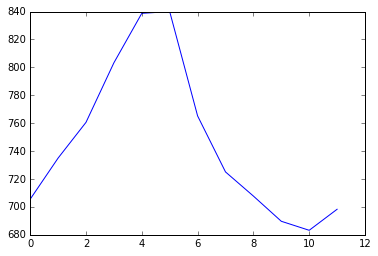

In [18]:
pylab.plot(np.mean(yearly, axis=0))

Often we doing analysis, we want to subtract off the mean from data to get values centered around zero. It isn't surprising that we can subtract the scalar mean from the 2-D array of values.

In [19]:
yearly - np.mean(yearly)

array([[ -1.68044872e+02,  -1.37044872e+02,  -1.18044872e+02,
         -8.10448718e+01,  -3.30448718e+01,  -3.90448718e+01,
         -1.18044872e+02,  -1.58044872e+02,  -1.70044872e+02,
         -1.80044872e+02,  -1.85044872e+02,  -1.75044872e+02],
       [ -1.57044872e+02,  -1.31044872e+02,  -1.05044872e+02,
         -6.40448718e+01,  -1.80448718e+01,  -2.00448718e+01,
         -9.80448718e+01,  -1.41044872e+02,  -1.55044872e+02,
         -1.70044872e+02,  -1.73044872e+02,  -1.59044872e+02],
       [ -1.30044872e+02,  -9.80448718e+01,  -7.10448718e+01,
         -3.10448718e+01,   9.95512821e+00,  -4.48717949e-02,
         -8.10448718e+01,  -1.19044872e+02,  -1.34044872e+02,
         -1.47044872e+02,  -1.44044872e+02,  -1.24044872e+02],
       [ -1.00044872e+02,  -7.00448718e+01,  -5.00448718e+01,
         -1.40448718e+01,   2.09551282e+01,   2.09551282e+01,
         -5.70448718e+01,  -1.05044872e+02,  -1.22044872e+02,
         -1.37044872e+02,  -1.36044872e+02,  -1.23044872e+02],
    

What you see above is a special case of what numpy calls **broadcasting**. Conceptually the scalar mean was replicated into a 13 by 12 array and then that array was combined subtracted from the 2-D array.

**Broadcasting** is more general than simply expanding a single value. For example, I can subtract off the column means. Again, think of this as computing the 12 column means and then duplicating them 13 times into a 13 by 12 array which is then subtracted.

In [20]:
yearly - np.mean(yearly, axis=0)

array([[-127.53846154, -126.        , -132.61538462, -138.30769231,
        -125.76923077, -133.        , -137.23076923, -137.07692308,
        -131.76923077, -123.69230769, -122.23076923, -127.30769231],
       [-116.53846154, -120.        , -119.61538462, -121.30769231,
        -110.76923077, -114.        , -117.23076923, -120.07692308,
        -116.76923077, -113.69230769, -110.23076923, -111.30769231],
       [ -89.53846154,  -87.        ,  -85.61538462,  -88.30769231,
         -82.76923077,  -94.        , -100.23076923,  -98.07692308,
         -95.76923077,  -90.69230769,  -81.23076923,  -76.30769231],
       [ -59.53846154,  -59.        ,  -64.61538462,  -71.30769231,
         -71.76923077,  -73.        ,  -76.23076923,  -84.07692308,
         -83.76923077,  -80.69230769,  -73.23076923,  -75.30769231],
       [ -41.53846154,  -45.        ,  -38.61538462,  -37.30769231,
         -42.76923077,  -31.        ,  -44.23076923,  -41.07692308,
         -37.76923077,  -35.69230769,  -29.2

I can name these intermediate values. Below, I see how many months are greater than the mean for their column. Note the layout of the True and False values is different from the result we got above.

In [21]:
monthlyMean = np.mean(yearly, axis=0)
biggerThanMonthlyMean = yearly > monthlyMean
print(biggerThanMonthlyMean)

[[False False False False False False False False False False False False]
 [False False False False False False False False False False False False]
 [False False False False False False False False False False False False]
 [False False False False False False False False False False False False]
 [False False False False False False False False False False False False]
 [False False False False False False False False False False False False]
 [False False False  True  True False  True  True  True  True  True False]
 [ True  True  True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True  True]]


Here is the bug I was talking about above. Obviously, the count_nonzero function should take the axis argument so we could get the column sums. Unfortunately it simply ignores it. 

In [22]:
np.count_nonzero(biggerThanMonthlyMean, axis=0)

79

The solution is to use the hack above and **sum** the values with an axis argument. I get 12 numbers which are the count of the number of times True occurs in each column in biggerThanMonthlyMean.

In [23]:
np.sum(biggerThanMonthlyMean, axis=0)

array([6, 6, 6, 7, 7, 6, 7, 7, 7, 7, 7, 6])

I can get the yearly counts as well. 

In [24]:
np.sum(biggerThanMonthlyMean, axis=1)

array([ 0,  0,  0,  0,  0,  0,  7, 12, 12, 12, 12, 12, 12])